<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: Ratas.py 🐁

- Nombre de alumno 1: Geraldyn Pérez
- Nombre de alumno 2: Diego Rojas


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/Geral37/MDS7202.git)

### Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
!pip install xgboost

In [3]:
# Inserte su código aquí

df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Qué usamos para escalar? maxmin? o n(0,1)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=7)

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_features = X.select_dtypes(include=['float64', 'int64']).columns

# Para el preprocesamiento probemos con n(0,1)?
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ], 
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [7]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='mlogloss'))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Reporte
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74     11853
         1.0       0.73      0.79      0.76     11711

    accuracy                           0.75     23564
   macro avg       0.75      0.75      0.75     23564
weighted avg       0.75      0.75      0.75     23564



*  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)

Dado el accuracy obtenido, se puede concluir que el rendimiento del modelo es aceptable para predecir si alguien padece diabetes, pero está lejos de ser perfecto. Es necesario mejorar los resultados obtenidos en las métricas. 

* ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)

Precisión indica cuántos de los que se clasifican como diabéticos realmente lo son (falsos positivos).
Recall te dice cuántos de los pacientes que en realidad tienen diabetes fueron correctamente identificados por el modelo.
F1-score combina ambos, siendo útil cuando tienes un desbalance entre las clases.

* ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

Por el valor obtenido en las métricas, es posible extraer que algunas caracteristicas no son realmente relevantes o no aportan información, entre las que se están utilizando para el entrenamiento.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

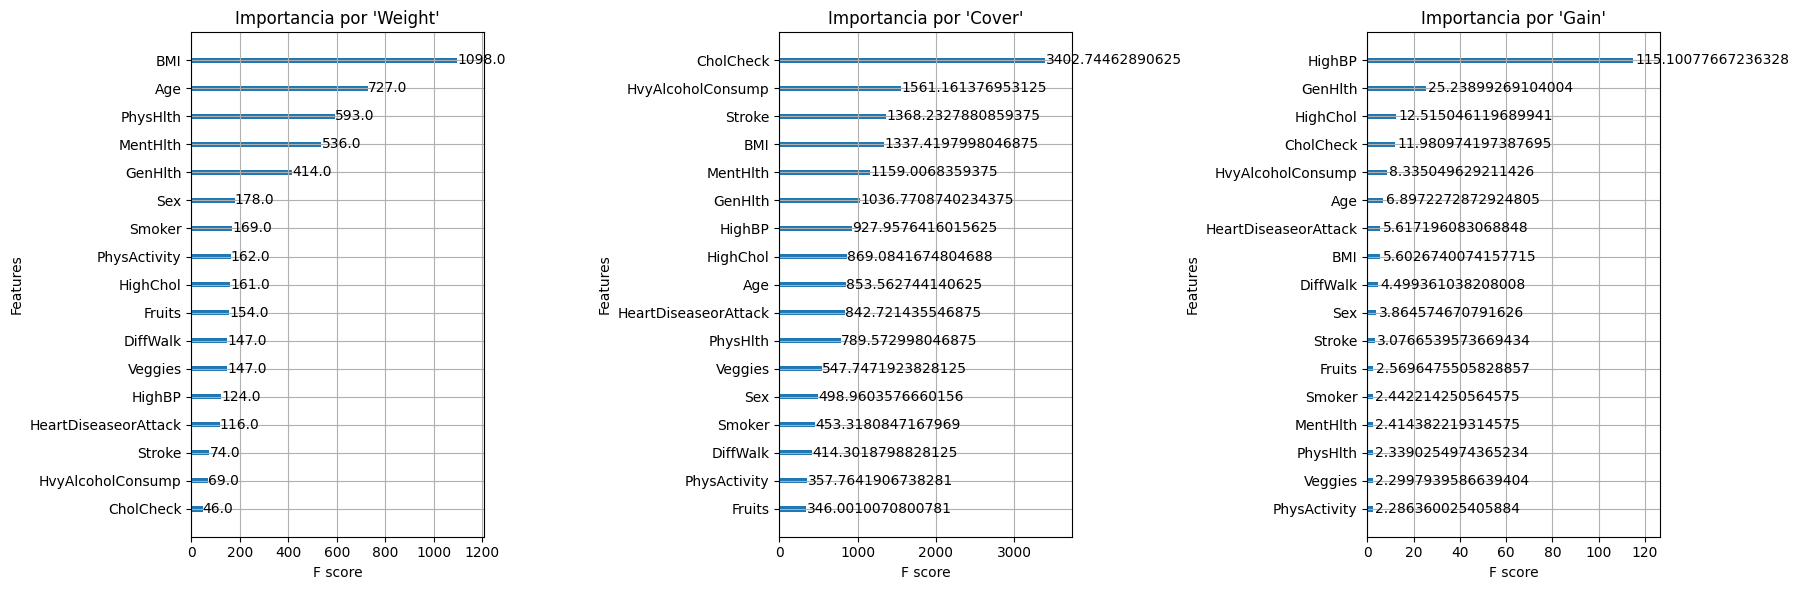

Importancias redondeadas (2 decimales):
Por 'weight': {'Age': 727.0, 'Sex': 178.0, 'HighChol': 161.0, 'CholCheck': 46.0, 'BMI': 1098.0, 'Smoker': 169.0, 'HeartDiseaseorAttack': 116.0, 'PhysActivity': 162.0, 'Fruits': 154.0, 'Veggies': 147.0, 'HvyAlcoholConsump': 69.0, 'GenHlth': 414.0, 'MentHlth': 536.0, 'PhysHlth': 593.0, 'DiffWalk': 147.0, 'Stroke': 74.0, 'HighBP': 124.0}
Por 'cover': {'Age': 853.56, 'Sex': 498.96, 'HighChol': 869.08, 'CholCheck': 3402.74, 'BMI': 1337.42, 'Smoker': 453.32, 'HeartDiseaseorAttack': 842.72, 'PhysActivity': 357.76, 'Fruits': 346.0, 'Veggies': 547.75, 'HvyAlcoholConsump': 1561.16, 'GenHlth': 1036.77, 'MentHlth': 1159.01, 'PhysHlth': 789.57, 'DiffWalk': 414.3, 'Stroke': 1368.23, 'HighBP': 927.96}
Por 'gain': {'Age': 6.9, 'Sex': 3.86, 'HighChol': 12.52, 'CholCheck': 11.98, 'BMI': 5.6, 'Smoker': 2.44, 'HeartDiseaseorAttack': 5.62, 'PhysActivity': 2.29, 'Fruits': 2.57, 'Veggies': 2.3, 'HvyAlcoholConsump': 8.34, 'GenHlth': 25.24, 'MentHlth': 2.41, 'PhysHlth': 

In [8]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Acceder al modelo XGBoost dentro del pipeline
xgb_model = pipeline.named_steps['classifier']

# Obtener las importancias de las características para los 3 tipos
importances_weight = xgb_model.get_booster().get_score(importance_type='weight')
importances_cover = xgb_model.get_booster().get_score(importance_type='cover')
importances_gain = xgb_model.get_booster().get_score(importance_type='gain')

# Redondear las importancias a 2 decimales
importances_weight = {key: round(value, 2) for key, value in importances_weight.items()}
importances_cover = {key: round(value, 2) for key, value in importances_cover.items()}
importances_gain = {key: round(value, 2) for key, value in importances_gain.items()}

# Graficar la importancia de las características utilizando los diferentes métodos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Importancia por 'weight'
plot_importance(xgb_model, importance_type='weight', ax=axes[0], title="Importancia por 'Weight'")

# Importancia por 'cover'
plot_importance(xgb_model, importance_type='cover', ax=axes[1], title="Importancia por 'Cover'")

# Importancia por 'gain'
plot_importance(xgb_model, importance_type='gain', ax=axes[2], title="Importancia por 'Gain'")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Imprimir las importancias redondeadas para revisar los resultados
print("Importancias redondeadas (2 decimales):")
print("Por 'weight':", importances_weight)
print("Por 'cover':", importances_cover)
print("Por 'gain':", importances_gain)

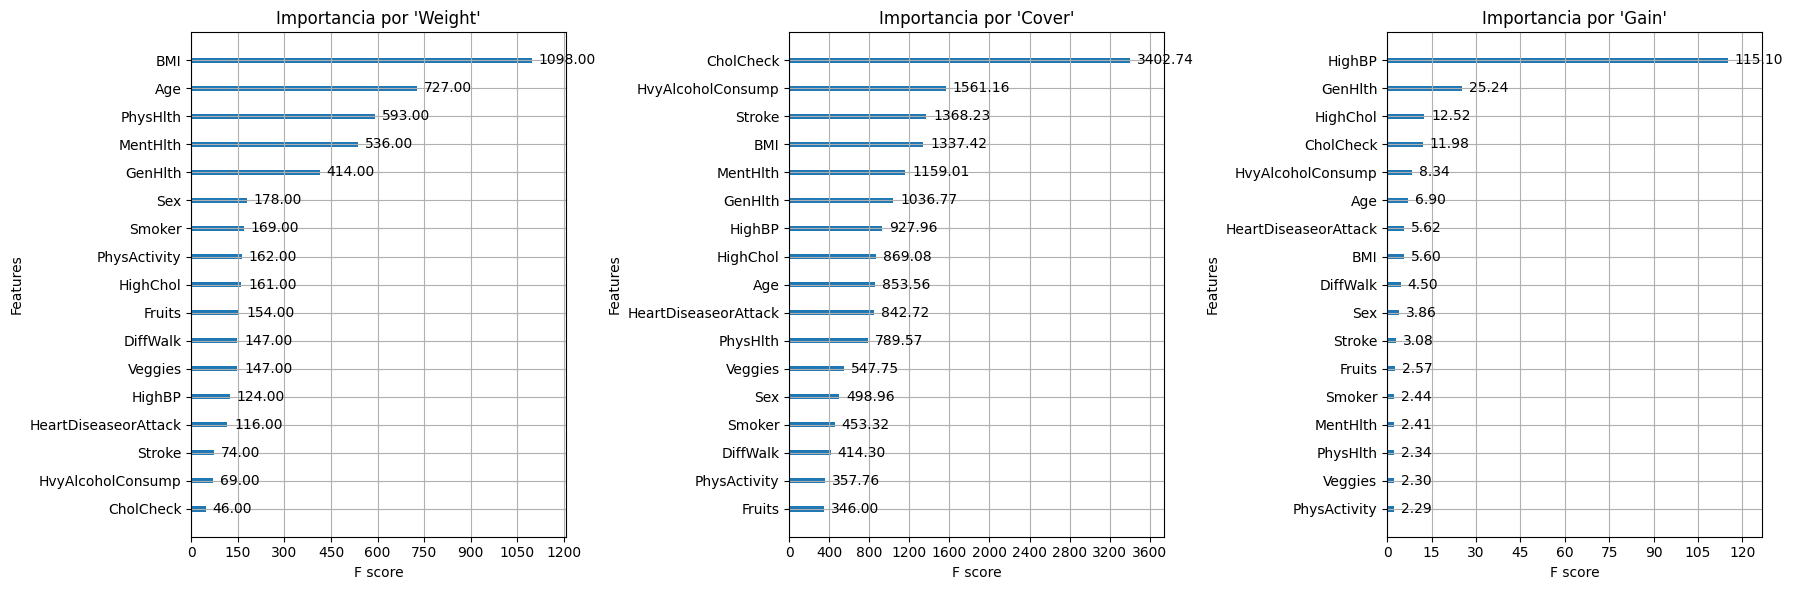

In [9]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from matplotlib.ticker import MaxNLocator

# Acceder al modelo XGBoost dentro del pipeline
xgb_model = pipeline.named_steps['classifier']

# Crear un gráfico de importancia para cada tipo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar la importancia por 'weight'
plot_importance(xgb_model, importance_type='weight', ax=axes[0], title="Importancia por 'Weight'", show_values=False)
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))  # Eje X sin decimales

# Añadir etiquetas con 2 decimales sobre las barras
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width():.2f}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points',
                     ha='left', va='center')

# Graficar la importancia por 'cover'
plot_importance(xgb_model, importance_type='cover', ax=axes[1], title="Importancia por 'Cover'", show_values=False)
axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))  # Eje X sin decimales

# Añadir etiquetas con 2 decimales sobre las barras
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():.2f}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points',
                     ha='left', va='center')

# Graficar la importancia por 'gain'
plot_importance(xgb_model, importance_type='gain', ax=axes[2], title="Importancia por 'Gain'", show_values=False)
axes[2].xaxis.set_major_locator(MaxNLocator(integer=True))  # Eje X sin decimales

# Añadir etiquetas con 2 decimales sobre las barras
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_width():.2f}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points',
                     ha='left', va='center')

# Ajustar el layout para que se vea bien
plt.tight_layout()
plt.show()

2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. 

Los métodos weight, cover y gain en XGBoost miden la importancia de las características desde perspectivas diferentes. Weight representa la frecuencia de uso de cada característica en las divisiones de los árboles; en este análisis, variables como BMI, Age y MentHlth muestran valores altos, lo que indica un uso frecuente. Cover mide el alcance de cada característica en términos de muestras divididas, destacando variables como CholCheck y HvyAlcoholConsump, que impactan un número significativo de datos. Por último, gain evalúa la mejora en precisión, resaltando HighBP y GenHlth como las más útiles para reducir el error del modelo.

3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

Las importancias de características en modelos de árboles dan una visión general de qué variables son influyentes, pero no logran una interpretabilidad completa. Este método tiene la debilidad de no capturar cómo las interacciones entre variables afectan las predicciones ni permite entender decisiones específicas.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [10]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance

results = permutation_importance(xgb_model, X_test, y_test, n_repeats=30, random_state=7)
results

{'importances_mean': array([ 4.10230295e-05,  0.00000000e+00,  7.86934872e-03,  1.05669666e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.04549313e-03,
        -4.55497086e-04, -9.68992248e-04,  0.00000000e+00, -4.62570022e-04,
         1.61404402e-03,  1.24059299e-03,  0.00000000e+00,  0.00000000e+00,
         1.13874271e-03]),
 'importances_std': array([0.00012127, 0.        , 0.00068758, 0.00064574, 0.        ,
        0.        , 0.        , 0.00051271, 0.00062811, 0.00057514,
        0.        , 0.00036182, 0.00080142, 0.00041921, 0.        ,
        0.        , 0.00027916]),
 'importances': array([[-1.69750467e-04,  4.24376167e-05,  2.12188084e-04,
         -1.27312850e-04,  1.69750467e-04,  1.27312850e-04,
          2.12188084e-04, -4.24376167e-05,  2.12188084e-04,
          1.27312850e-04, -8.48752334e-05,  8.48752334e-05,
          2.12188084e-04,  8.48752334e-05, -4.24376167e-05,
         -4.24376167e-05, -4.24376167e-05,  1.69750467e-04,
          2.54625

In [13]:
feature_names = xgb_model.get_booster().feature_names
feature_names

['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Stroke',
 'HighBP']

La  desviación estándar señala la estabilidad de la importancia de cada característica. En particular:

- Las caracteristicas Sex, Smoker, HeartDiseaseorAttack, DiffWalk, Stroke, HighBP, BMI, HighChol, CholCheck, Veggies y Fruits, tienen una desviación estándar de cero o muy cercana a cero, lo que indica que su importancia es muy consistente a lo largo de las 30 permutaciones, es decir, son muy estables y siempre tienen el mismo impacto en la predicción del modelo cuando se reordenan aleatoriamente.

- Las caracteristicas Age, PhysActivity, MentHlth, PhysHlth, HvyAlcoholConsump y GenHlth presentan pequeñas desviaciones estándar, lo que sugiere que, aunque sus importancias son consistentes, hay algo de variabilidad. En este caso, es posible que haya situaciones donde la influencia de estas características varíe ligeramente según la permutación realizada, pero no de manera significativa.

- Por último, la característica HighChol tiene la desviación estándar más alta (0.00068758), lo que indica que su importancia es más variable en las 30 permutaciones. Esto podría sugerir que su contribución al modelo es más sensible al orden de las características, lo que podría reflejar una relación menos estable o más contextual con la variable dependiente.

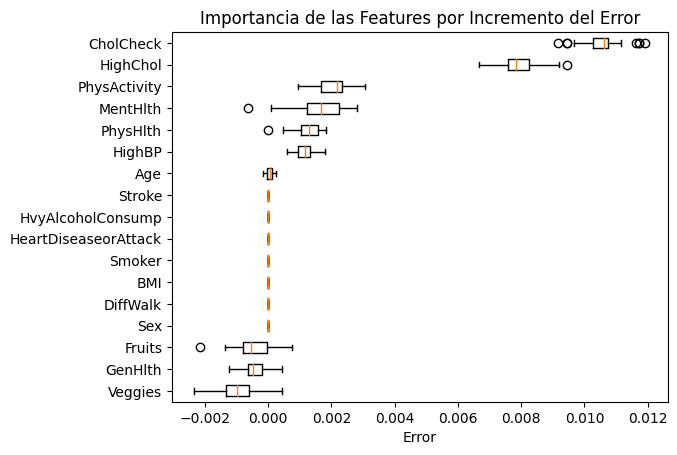

In [ ]:
perm_sorted_idx = results.importances_mean.argsort()
plt.boxplot(
    results.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

4. TERMINAR
- ¿Cómo mide la importancia de las features su propuesta? 
El método de permutación mide la importancia de las características al observar cuánto afecta la precisión del modelo cuando se permutan (o se reordenan aleatoriamente) los valores de una característica específica en los datos de entrada, manteniendo las demás constantes.

- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? 

Se puede observar que las siguientes features son las que tienen mayor impacto en la salida del modelo: CholCheck, HighChol, PhysActivity, MentHlth y  PhysHlth.


- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? 

Ahora se obtienen diferentes features como las más importantes. Cholcheck es la más importante igual que en Cover. HighChol es la segunda más importante, aunque solo en Gain estaba dentro de las 5 primeras. PhysActivity es la tercera más importante, aunque en Cover y Gain era de las menos importantes y En Weight era la número 8. MentHlth y  PhysHlth son la cuarta y quinta más importantes pero solo en Weight estaban dentro de las 5 primeras. Por lo que los resultados obtenidos son una mezcla de los 3 anteriores.


- Nombre y explique 3 ventajas y 3 desventajas del método implementado. 

Ventajas:
- Facil interpretación: El método de permutación es intuitivo y sencillo de comprender. Permite observar el impacto directo de cada característica sobre el rendimiento del modelo, lo cual facilita la interpretación del modelo y su comportamiento con respecto a las variables de entrada.

- Alta comprensión de interpretabilidad global: Al calcular la importancia de cada característica a nivel global (es decir, para todo el conjunto de datos), se obtiene una visión clara de cuáles son las variables más influyentes en la predicción del modelo. Esto es útil para comprender el modelo en su conjunto y no sólo a nivel de instancias individuales.

- Toma en cuenta las interacciones: A diferencia de otros métodos, como la importancia basada en los coeficientes de un modelo lineal, el método de permutación captura el efecto real de una variable en el desempeño del modelo, considerando las interacciones entre variables. Esto es especialmente importante cuando las características están relacionadas de manera compleja.


Desventajas:
- Enlazado al error del modelo: El método de permutación está basado en la evaluación del modelo a través de su desempeño (error) después de permutar las características. Si el modelo tiene un error alto o es inestable, las importancias calculadas también serán imprecisas, lo que limita la fiabilidad del análisis.

- Necesitas acceso a la gold label:  Para calcular la importancia de las características, es necesario tener acceso a las etiquetas reales (gold label) del conjunto de datos. Esto implica que el método no puede ser utilizado en escenarios de predicción donde solo se cuenta con datos sin etiquetar o cuando se está trabajando con datos nuevos no etiquetados.

- Si las features están correlacionadas puede generar sesgos por entradas poco realistas: Si las características están altamente correlacionadas, la permutación puede producir resultados engañosos. La permutación de una variable correlacionada puede afectar a otras características de manera indirecta, lo que podría generar sesgos al evaluar la importancia. Además, las permutaciones pueden no reflejar situaciones del mundo real si las combinaciones de características no se producen de forma realista.


## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [14]:
!pip install shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.2 kB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 194.6/456.2 kB 2.4 MB/s eta 0:00:01
   -------------------------------- ------- 368.6/456.2 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 2.6 MB/s eta 0:00:00


In [15]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [19]:
# Inserte código para calcular shapley values aquí
import shap

clf = xgb_model
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X)
shap_values

.values =
array([[-0.21333095, -0.08966094, -0.51981205, ...,  0.11307231,
         0.0224058 ,  0.28495207],
       [ 0.09684935, -0.11818036,  0.3393038 , ...,  0.05767738,
        -0.00494987,  0.40812027],
       [ 0.26640484, -0.11387381, -0.2209944 , ..., -0.02511706,
         0.00962224, -0.5130709 ],
       ...,
       [ 0.22890423, -0.15159099,  0.37729263, ...,  0.17142607,
        -0.0059765 ,  0.39620495],
       [-0.24196014, -0.1427629 ,  0.34699565, ...,  0.05187901,
        -0.01043641,  0.4077026 ],
       [-0.12739813, -0.08320155,  0.3197397 , ...,  0.04507272,
        -0.01299272,  0.39931047]], dtype=float32)

.base_values =
array([-0.00177084, -0.00177084, -0.00177084, ..., -0.00177084,
       -0.00177084, -0.00177084], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

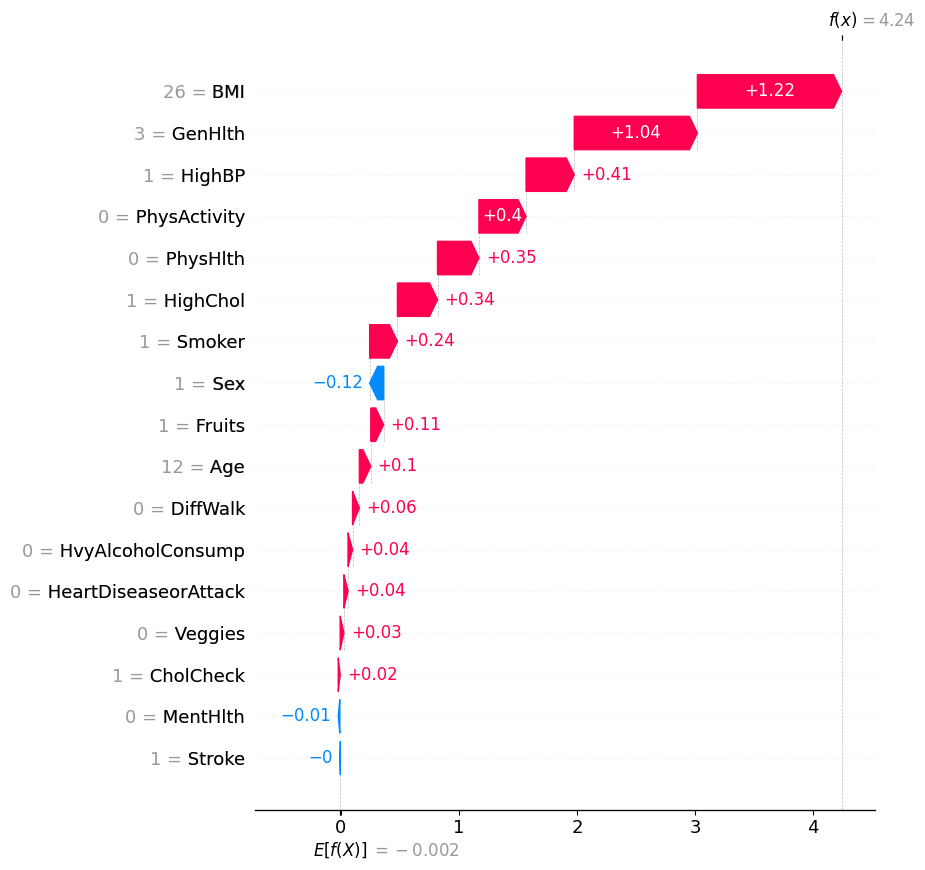

In [28]:
# Inserte código para generar gráficos de aporte local aquí
idx=1
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=17)

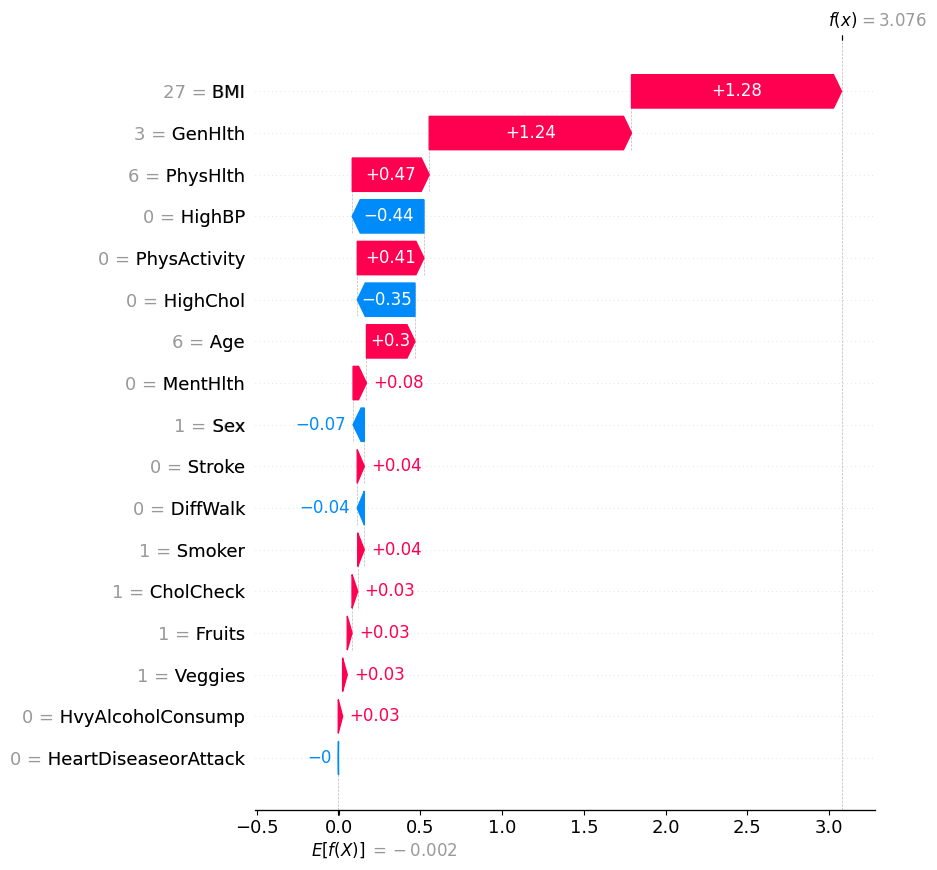

In [29]:
idx=9
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=17)

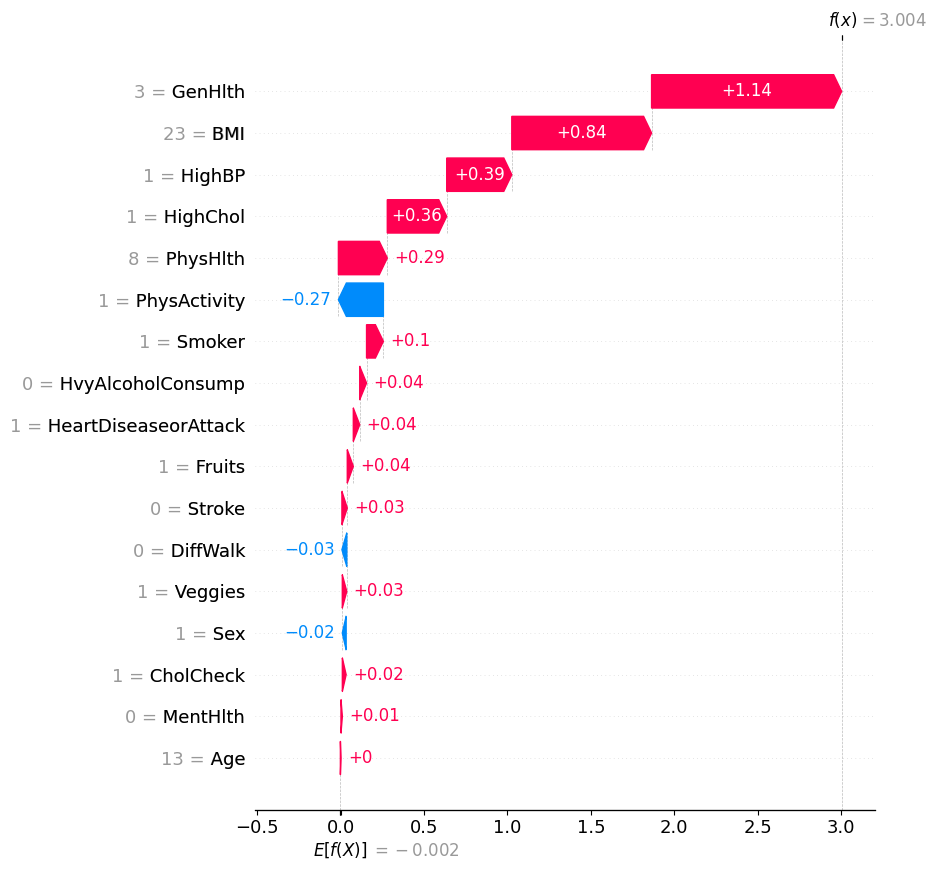

In [32]:
idx=150
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=17)

- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 


- ¿Existe algún patrón común entre las instancias analizadas?


- ¿Es posible generalizar estas conclusiones a todo el dataset?


### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

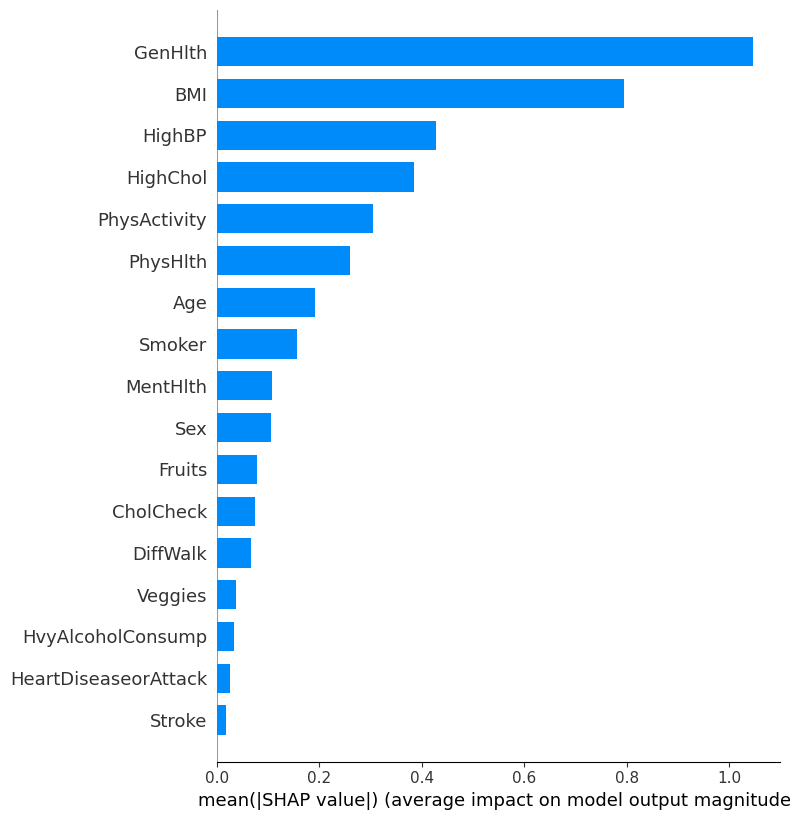

In [34]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X, plot_type="bar")

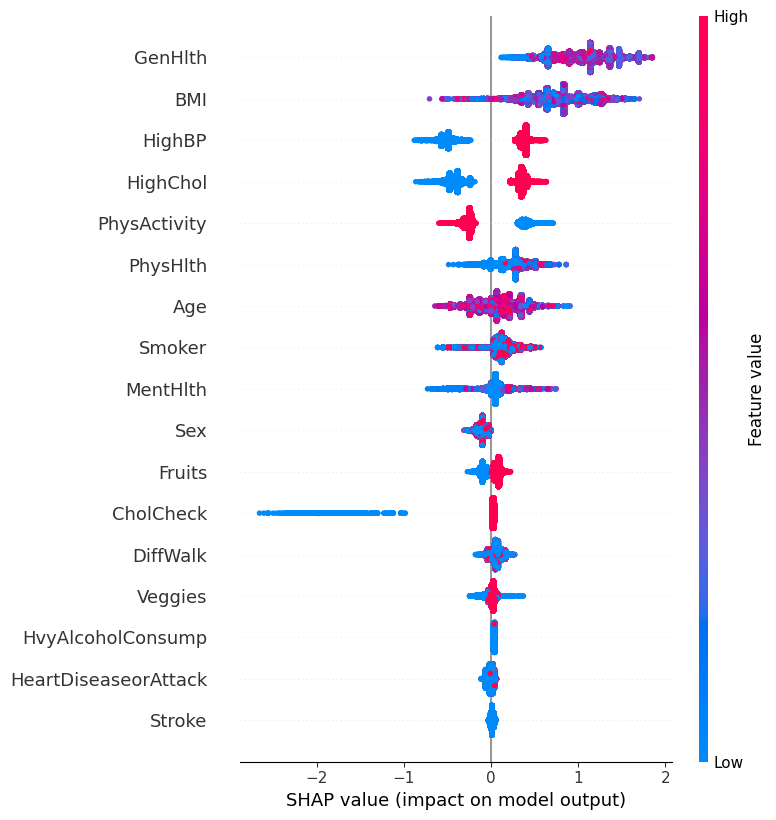

In [35]:
shap.summary_plot(shap_values, X)

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [37]:
# Inserte código para generar gráficos de feature vs shap value aquí
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]
feature_importance_names

Index(['GenHlth', 'BMI', 'HighBP', 'HighChol', 'PhysActivity', 'PhysHlth',
       'Age', 'Smoker', 'MentHlth', 'Sex', 'Fruits', 'CholCheck', 'DiffWalk',
       'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack', 'Stroke'],
      dtype='object')

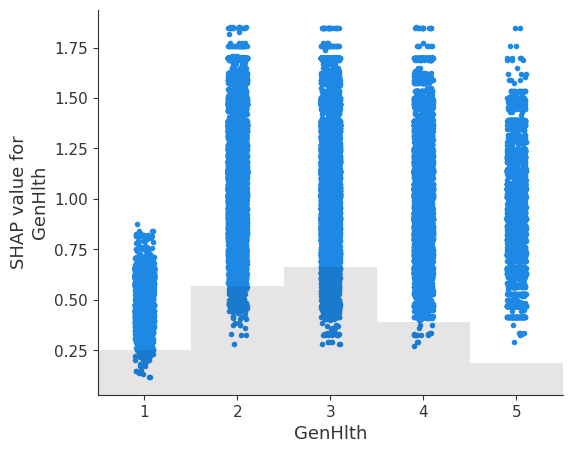

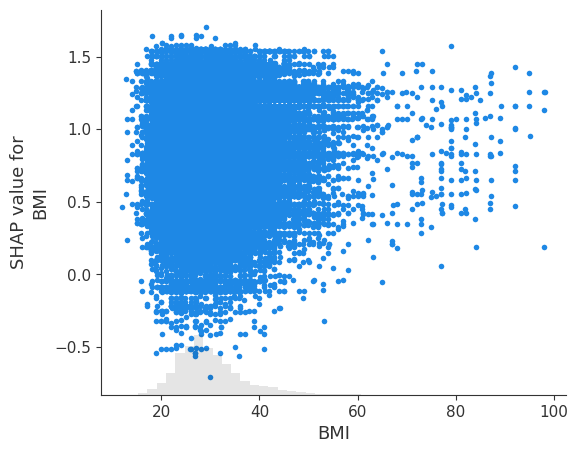

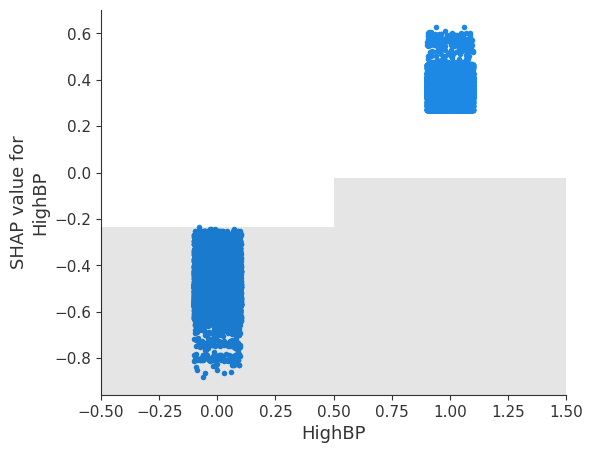

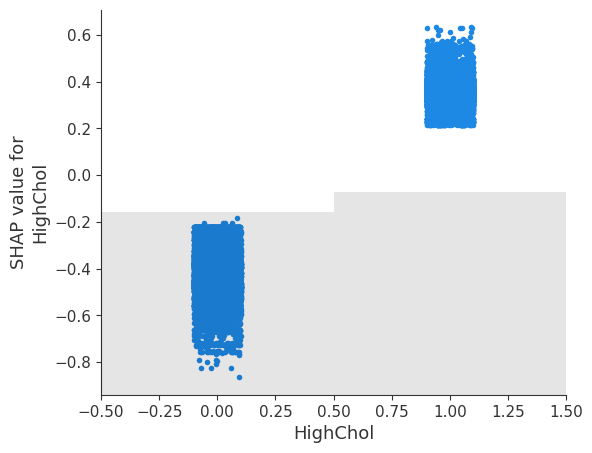

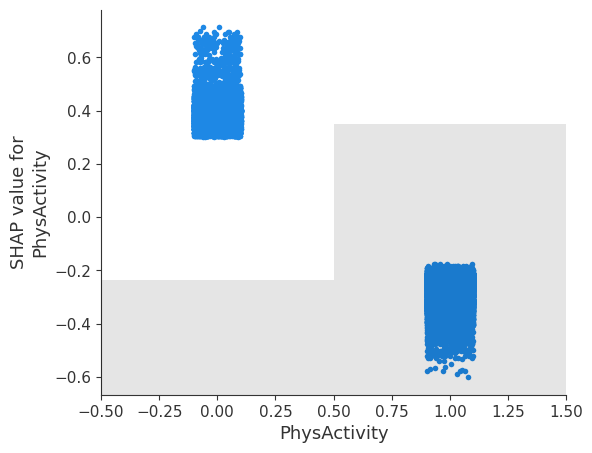

In [39]:
for name in feature_importance_names[:5]:
    shap.plots.scatter(shap_values[:,name])

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
# Inserte código para generar gráficos PDP aquí


## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. 
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`. 

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from alibi.explainers import AnchorTabular

2023-06-16 03:21:35.062920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 03:21:35.266905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-16 03:21:35.266966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-16 03:21:35.308521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 03:21:38.061257: W tensorflow/stream_executor/platform/de

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>